<a href="https://colab.research.google.com/github/efra08/CNN-MobileNetV2/blob/main/MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
base_dir = '/content/gdrive/My Drive/NewTeh1/Data train/'

os.listdir(base_dir)

['healthy',
 'gray_blight',
 'algal_spot',
 'brown_blight',
 'red_spot',
 'helopeltis']

In [ ]:
# import os
# base_dir = '/content/gdrive/My Drive/NewTeh1/Data train/'
# label = os.listdir(base_dir)
# label

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(224, 224),
        batch_size= 16,
        shuffle=True,
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(224, 224),
        batch_size= 16,
        subset='validation')

Found 4080 images belonging to 6 classes.
Found 1020 images belonging to 6 classes.


In [ ]:
model = MobileNetV2(include_top = False,
                          weights = 'imagenet',
                          input_shape = (224,224,3))
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
for layer in model.layers:
  if layer.name == 'block_11_add':
    break
  layer.trainable = False
  print('Layer' + layer.name + 'frozen.')
model.summary()

Layerinput_1frozen.
LayerConv1frozen.
Layerbn_Conv1frozen.
LayerConv1_relufrozen.
Layerexpanded_conv_depthwisefrozen.
Layerexpanded_conv_depthwise_BNfrozen.
Layerexpanded_conv_depthwise_relufrozen.
Layerexpanded_conv_projectfrozen.
Layerexpanded_conv_project_BNfrozen.
Layerblock_1_expandfrozen.
Layerblock_1_expand_BNfrozen.
Layerblock_1_expand_relufrozen.
Layerblock_1_padfrozen.
Layerblock_1_depthwisefrozen.
Layerblock_1_depthwise_BNfrozen.
Layerblock_1_depthwise_relufrozen.
Layerblock_1_projectfrozen.
Layerblock_1_project_BNfrozen.
Layerblock_2_expandfrozen.
Layerblock_2_expand_BNfrozen.
Layerblock_2_expand_relufrozen.
Layerblock_2_depthwisefrozen.
Layerblock_2_depthwise_BNfrozen.
Layerblock_2_depthwise_relufrozen.
Layerblock_2_projectfrozen.
Layerblock_2_project_BNfrozen.
Layerblock_2_addfrozen.
Layerblock_3_expandfrozen.
Layerblock_3_expand_BNfrozen.
Layerblock_3_expand_relufrozen.
Layerblock_3_padfrozen.
Layerblock_3_depthwisefrozen.
Layerblock_3_depthwise_BNfrozen.
Layerblock_3_de

In [ ]:
from keras.layers import BatchNormalization
from keras import Model

inp = model.input
m = model.output
m = Flatten()(m)
m = Dense(64, activation='relu')(m)
m = BatchNormalization()(m)
m = Dropout(0.1)(m)
predict = Dense(6, activation='softmax')(m)

model_new = Model(inputs=model.input, outputs=predict)
model_new.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
from keras.optimizers import Adam

opt = Adam(0.0001, beta_1=0.9, beta_2=0.999, amsgrad=True)
model_new.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
history = model_new.fit(
      train_generator,
      validation_data=validation_generator,
      epochs=15,
      steps_per_epoch=len(train_generator),
      validation_steps=len(validation_generator),
      verbose=2)

Epoch 1/15
255/255 - 96s - loss: 0.6660 - accuracy: 0.7691 - precision: 0.8320 - recall: 0.7199 - val_loss: 2.0279 - val_accuracy: 0.5255 - val_precision: 0.5346 - val_recall: 0.5069 - 96s/epoch - 376ms/step
Epoch 2/15
255/255 - 79s - loss: 0.3253 - accuracy: 0.8865 - precision: 0.9128 - recall: 0.8676 - val_loss: 1.8227 - val_accuracy: 0.5520 - val_precision: 0.5559 - val_recall: 0.5314 - 79s/epoch - 308ms/step
Epoch 3/15
255/255 - 73s - loss: 0.2218 - accuracy: 0.9218 - precision: 0.9379 - recall: 0.9076 - val_loss: 1.2811 - val_accuracy: 0.7500 - val_precision: 0.7726 - val_recall: 0.7363 - 73s/epoch - 288ms/step
Epoch 4/15
255/255 - 79s - loss: 0.1836 - accuracy: 0.9390 - precision: 0.9503 - recall: 0.9279 - val_loss: 1.1507 - val_accuracy: 0.7627 - val_precision: 0.7811 - val_recall: 0.7520 - 79s/epoch - 309ms/step
Epoch 5/15
255/255 - 74s - loss: 0.1520 - accuracy: 0.9502 - precision: 0.9581 - recall: 0.9412 - val_loss: 0.7813 - val_accuracy: 0.8431 - val_precision: 0.8587 - val_

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
# import matplotslib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

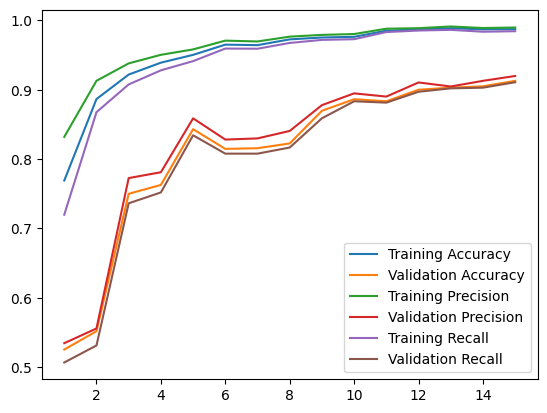

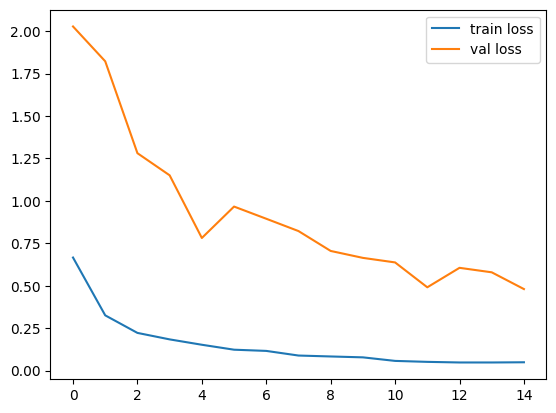

In [ ]:
import matplotlib.pyplot as plt

# Mengambil data akurasi, presisi, dan recall dari history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_precision = history.history['precision']
val_precision  = history.history['val_precision']
train_recall = history.history['recall']
val_recall  = history.history['val_recall']

# Mengambil data langkah (step)
steps = range(1, len(train_accuracy) + 1)

# Plotting grafik akurasi, presisi, dan recall pada setiap langkah
plt.plot(steps, train_accuracy, label='Training Accuracy')
plt.plot(steps, val_accuracy, label='Validation Accuracy')

plt.plot(steps, train_precision, label='Training Precision')
plt.plot(steps, val_precision, label='Validation Precision')

plt.plot(steps, train_recall, label='Training Recall')
plt.plot(steps, val_recall, label='Validation Recall')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
model_new.save('/content/gdrive/My Drive/NewTeh1/1MobileNet.h5')

In [ ]:
# load trained model
model = load_model('/content/gdrive/My Drive/NewTeh1/1MobileNet.h5')
# define test data generator with rescaling only
test_datagen = ImageDataGenerator(rescale=1./255)

# load test data
test_data = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/NewTeh1/Data test/',
    target_size=(224, 224), # set image size as same as training data
    batch_size=32,
    shuffle = False,
    class_mode='categorical')

# evaluate model on test data
test_accuracy = model.evaluate(test_data)
print('Test Accuracy:', test_accuracy)

Found 880 images belonging to 6 classes.
28/28 [==============================] - 460s 17s/step - loss: 0.0354 - accuracy: 0.9886 - precision: 0.9920 - recall: 0.9875
Test Accuracy: [0.03537309914827347, 0.9886363744735718, 0.9920091032981873, 0.987500011920929]


Found 880 images belonging to 6 classes.
28/28 [==============================] - 196s 7s/step
Confusion Matrix:
[[150   0   0   0   0   0]
 [  0 130   0   0   0   0]
 [  0   1 148   0   0   1]
 [  0   0   0 145   2   3]
 [  0   0   0   0 150   0]
 [  0   1   1   1   0 147]]


Text(77.92222222222227, 0.5, 'True Label')

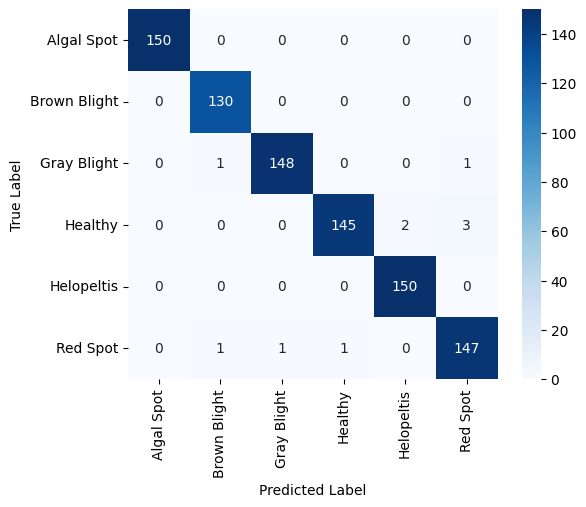

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# load the model

model = load_model('/content/gdrive/My Drive/NewTeh1/1MobileNet.h5')

# define test data generator with rescaling only
test_datagen = ImageDataGenerator(rescale=1./255)

# load test data
test_data = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/NewTeh1/Data test/',
    target_size=(224, 224), # set image size as same as training data
    batch_size=32,
    shuffle = False,
    class_mode='categorical')

label_names = list(test_data.class_indices.keys())

# make predictions on test data
test_predictions = model.predict(test_data)

# convert predictions from one-hot encoding to class labels
test_labels = np.argmax(test_predictions, axis=1)

# get true labels of test data
true_labels = test_data.classes

# compute confusion matrix
cm = confusion_matrix(true_labels, test_labels)

# display confusion matrix
print('Confusion Matrix:')
print(cm)


sns.heatmap(cm ,annot=True, cmap= "Blues", fmt="d", square=True,
            xticklabels=label_names, yticklabels=label_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

In [ ]:
import sklearn.metrics as metrics

report = metrics.classification_report(true_labels, test_labels, target_names=label_names)
print(report)

              precision    recall  f1-score   support

  Algal Spot       1.00      1.00      1.00       150
Brown Blight       0.98      1.00      0.99       130
 Gray Blight       0.99      0.99      0.99       150
     Healthy       0.99      0.97      0.98       150
  Helopeltis       0.99      1.00      0.99       150
    Red Spot       0.97      0.98      0.98       150

    accuracy                           0.99       880
   macro avg       0.99      0.99      0.99       880
weighted avg       0.99      0.99      0.99       880



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute overall accuracy
accuracy = accuracy_score(true_labels, test_labels)
print('Accuracy:', accuracy)
  # print('Class', i+1,'Akurasi', accuracy[i])

# compute precision, recall, and F1-score for each class
precision = precision_score(true_labels, test_labels, average=None)
recall = recall_score(true_labels, test_labels, average=None)
f1 = f1_score(true_labels, test_labels, average=None)

# display metrics for each class
for i in range(len(precision)):
    print('Class', i+1, 'Precision:', precision[i])
    print('Class', i+1, 'Recall:', recall[i])
    print('Class', i+1, 'F1-score:', f1[i])


Accuracy: 0.9886363636363636
Class 1 Precision: 1.0
Class 1 Recall: 1.0
Class 1 F1-score: 1.0
Class 2 Precision: 0.9848484848484849
Class 2 Recall: 1.0
Class 2 F1-score: 0.9923664122137404
Class 3 Precision: 0.9932885906040269
Class 3 Recall: 0.9866666666666667
Class 3 F1-score: 0.9899665551839465
Class 4 Precision: 0.9931506849315068
Class 4 Recall: 0.9666666666666667
Class 4 F1-score: 0.9797297297297298
Class 5 Precision: 0.9868421052631579
Class 5 Recall: 1.0
Class 5 F1-score: 0.9933774834437086
Class 6 Precision: 0.9735099337748344
Class 6 Recall: 0.98
Class 6 F1-score: 0.9767441860465117


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(true_labels, test_labels)
precision = precision_score(true_labels, test_labels, average='weighted')
recall = recall_score(true_labels, test_labels, average='weighted')
f1 = f1_score(true_labels, test_labels, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.9886363636363636
Precision: 0.9886920457003772
Recall: 0.9886363636363636
F1-score: 0.988614007668603


In [ ]:
model = load_model('/content/gdrive/My Drive/NewTeh1/1MobileNet.h5')

In [ ]:
#convert format h5 ke tflite

model = tf.keras.models.load_model('/content/gdrive/My Drive/NewTeh1/1MobileNet.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("modelMobile.tflite", "wb").write(tflite_model)

24916380

In [ ]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print(class_names)

['algal_spot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot']
